<a href="https://colab.research.google.com/github/avawaxenberg/FDSfE_AWaxenberg/blob/main/HW5_Resubmitted/ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
distance_nearest_MRT_station = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/Real_estate.csv")

In [3]:
distance_nearest_MRT_station.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [4]:
distance_nearest_MRT_station.tail()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5
413,2013.500,6.5,90.45606,9,63.9


In [5]:
distance_nearest_MRT_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   transaction_date              414 non-null    float64
 1   house_age                     414 non-null    float64
 2   distance_nearest_MRT_station  414 non-null    float64
 3   convenience_stores            414 non-null    int64  
 4   house_price_unit_area         414 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


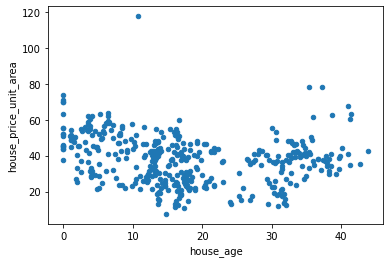

In [6]:
distance_nearest_MRT_station.plot('house_age', 'house_price_unit_area', kind="scatter");

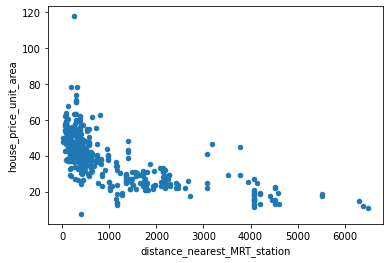

In [7]:
distance_nearest_MRT_station.plot('distance_nearest_MRT_station', 'house_price_unit_area', kind="scatter");

In [8]:
features = distance_nearest_MRT_station[["house_age", "convenience_stores", "transaction_date", "distance_nearest_MRT_station"]]
target = distance_nearest_MRT_station["house_price_unit_area"]

In [9]:
features.shape

(414, 4)

In [10]:
target.shape

(414,)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
mlr = LinearRegression()

In [13]:
mlr.fit(features, target)

LinearRegression()

In [14]:
print("r^2 of the model = {0:.1f}%".format(mlr.score(features, target)*100))

r^2 of the model = 55.5%


In [15]:
mlr.intercept_

-11588.747800126255

In [16]:
mlr.coef_

array([-2.54477973e-01,  1.25786410e+00,  5.77804282e+00, -5.51299698e-03])

In [17]:
distance_nearest_MRT_station["prediction"] = mlr.predict(features)

In [18]:
distance_nearest_MRT_station.head

<bound method NDFrame.head of      transaction_date  house_age  distance_nearest_MRT_station  \
0            2012.917       32.0                      84.87882   
1            2012.917       19.5                     306.59470   
2            2013.583       13.3                     561.98450   
3            2013.500       13.3                     561.98450   
4            2012.833        5.0                     390.56840   
..                ...        ...                           ...   
409          2013.000       13.7                    4082.01500   
410          2012.667        5.6                      90.45606   
411          2013.250       18.8                     390.96960   
412          2013.000        8.1                     104.81010   
413          2013.500        6.5                      90.45606   

     convenience_stores  house_price_unit_area  prediction  
0                    10                   37.9   45.940228  
1                     9                   42.2   46.641

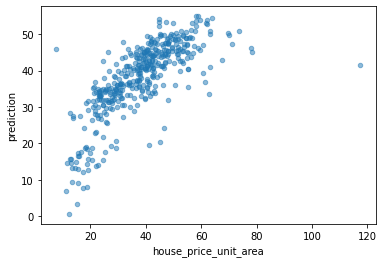

In [19]:
distance_nearest_MRT_station.plot("house_price_unit_area", "prediction", kind="scatter", alpha = 0.5);

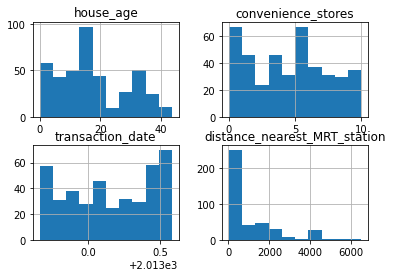

In [20]:
features.hist();

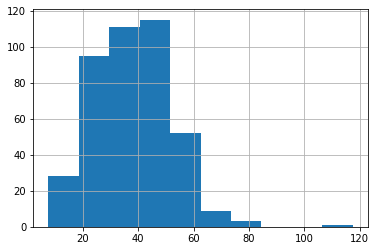

In [21]:
target.hist()

In [22]:
features_s = (features - features.mean()) / features.std()
target_s = (target - target.mean()) / target.std()

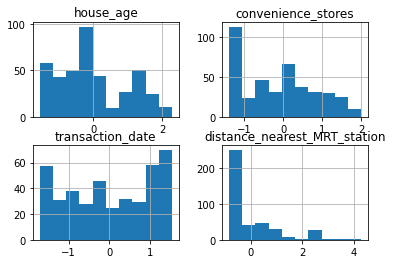

In [23]:
features_s.hist();

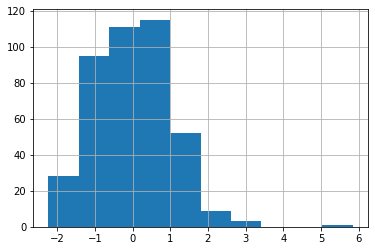

In [24]:
target_s.hist()

In [25]:
mlr_s = LinearRegression()

In [26]:
mlr_s.fit(features_s, target_s)

LinearRegression()

In [27]:
mlr.score(features, target)

0.5552973207362877

In [28]:
mlr_s.score(features_s, target_s)

0.5552973207362843

In [29]:
mlr.coef_

array([-2.54477973e-01,  1.25786410e+00,  5.77804282e+00, -5.51299698e-03])

In [30]:
mlr_s.coef_

array([-0.21307015,  0.27230513,  0.11973838, -0.51137417])

In [31]:
import statsmodels.formula.api as smf

In [32]:
df = features_s
df["target"] = target_s

In [33]:
df.head()

,house_age,convenience_stores,transaction_date,distance_nearest_MRT_station,target
0,1.254111,2.004982,-0.822688,-0.791537,-0.005894
1,0.156896,1.665488,-0.822688,-0.615866,0.310132
2,-0.387322,0.307513,1.539289,-0.413515,0.684953
3,-0.387322,0.307513,1.244928,-0.413515,1.236161
4,-1.115873,0.307513,-1.120595,-0.549332,0.376277


In [34]:
model = smf.ols(formula ="target ~ house_age + convenience_stores + transaction_date + distance_nearest_MRT_station", data=df)

In [35]:
results = model.fit()

In [36]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.23e-70
Time:                        01:07:13   Log-Likelihood:                -419.20
No. Observations:                 414   AIC:                             848.4
Df Residuals:                     409   BIC:                             868.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [37]:
mlr.intercept_

-11588.747800126255